### Part 2

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### Importing dataframes

In [2]:
# Path

path = r'C:\Users\andd0\Documents\InstaCart Basket Analysis'

In [3]:
# Importing latest dataframe

df_final_dataframe = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'dataframe_exercise_4_9.pkl'))

In [4]:
df_final_dataframe.shape

(32434212, 36)

In [5]:
df_final_dataframe.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,surname,gender,state,age,date_joined,n_dependents,fam_status,income,merging_status
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


#### <b>Step No. 3</b>

#### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
##### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

<Axes: ylabel='Frequency'>

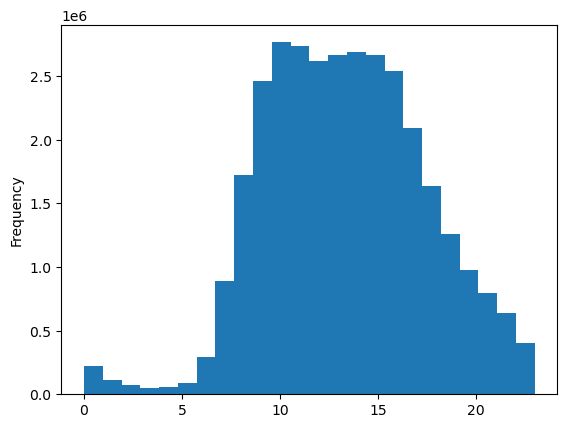

In [6]:
df_final_dataframe['order_hour_of_day'].plot.hist(bins = 24)

##### The histogram shows that customer orders are placed throughout the entire day, but activity significantly increases starting around 7 AM. 

##### Order volume peaks between 10 AM and 3 PM, indicating that this is the most active shopping window. After 4 PM, there's a noticeable decline in order frequency, which continues into the night. 

##### These insights suggest that the majority of customers prefer to place their orders during late morning to early afternoon hours.

#### <b>Step No. 4</b>

#### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

<Axes: xlabel='loyalty_flag'>

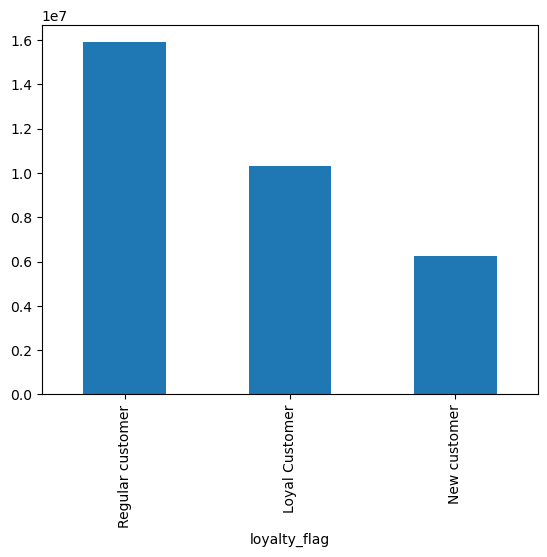

In [7]:
df_final_dataframe['loyalty_flag'].value_counts().plot.bar()

#### This visualization shows how orders are distributed across loyalty types. There's one row per order totalling 32,434,212:

##### <b>1)</b> 15,891,077 orders from regular customers (customers that order between 10 and 40 products)
##### <b>2)</b> 10,293,737 orders from loyal customers (customers that order more than 40 products)
##### <b>3)</b> 6,249,398 orders from new customers (customers that order less than 10 products)

In [8]:
df_final_dataframe['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15891077
Loyal Customer      10293737
New customer         6249398
Name: count, dtype: int64

#### There are 206,209 unique users:

<Axes: xlabel='loyalty_flag'>

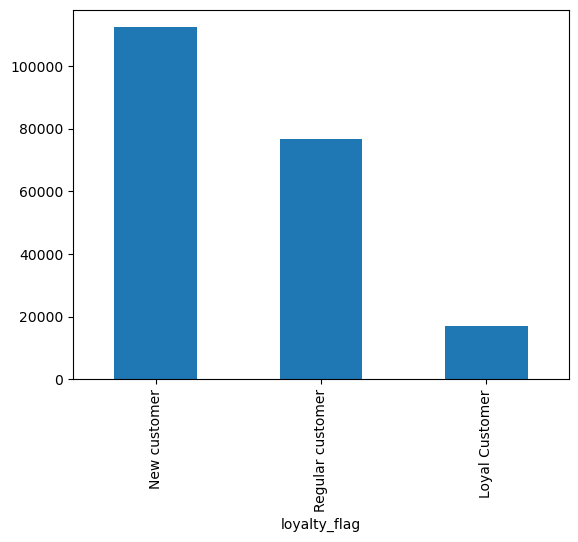

In [9]:
# This syntax is not included in the material. I just searched and found out that it could work for this purpose:

df_final_dataframe.drop_duplicates(subset='user_id')['loyalty_flag'].value_counts().plot(kind='bar')

In [10]:
df_final_dataframe.drop_duplicates(subset='user_id')['loyalty_flag'].value_counts()

loyalty_flag
New customer        112328
Regular customer     76864
Loyal Customer       17017
Name: count, dtype: int64

#### <b>Step No. 5</b>

#### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

#### Sampling

In [11]:
np.random.seed(4)

In [12]:
dev = np.random.rand(len(df_final_dataframe)) <= 0.7

In [13]:
big = df_final_dataframe[dev]

In [14]:
small = df_final_dataframe[~dev]

In [15]:
# Checking output:

len(big) + len(small)

32434212

In [16]:
# Storing the relevant columns in a variable

df_relevant_columns = small[['prices', 'order_hour_of_day']]

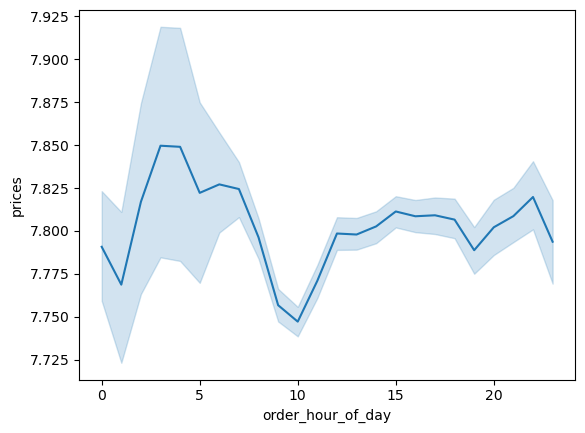

In [17]:
# Creating the line chart

line = sns.lineplot(data = df_relevant_columns, x = 'order_hour_of_day', y = 'prices')

#### Insights 

##### Is there a difference in expenditure depending on the hour of the day?

##### Yes, there is.

##### <b>From 00:00 to 05:00</b>

##### High spending - even though this is a low-orders timeframe. The average spending per product is high.

##### Possible reasons? Late-night shoppers may want to make bulk purchases or purchase more expensive products while there's less traffic.

##### <b>From 07:00 to 10:00</b>

##### While the orders increase (as seen in Step No. 3), the average spending drops.

##### Possible reasons? Perhaps users take a few minutes to visit the app and make quick purchases while they're working.

##### <b>From 10:00 onwards</b>

##### Prices rise again.

##### Possible reasons? Routine users.

##### <b>Opportunities</b>

##### Offers (e.g. free delivery, discounts) between 5 am - 10 am to increase sales during this timeframe

#### <b>Step No. 6</b>

##### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. 

##### First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.

#### Sampling

In [18]:
np.random.seed(4)

In [19]:
dev_1 = np.random.rand(len(df_final_dataframe)) <= 0.7

In [20]:
big_1 = df_final_dataframe[dev_1]

In [21]:
small_1 = df_final_dataframe[~dev_1]

In [22]:
# Checking output

len(big_1) + len(small_1)

32434212

In [23]:
# Storing the relevant columns in a new var

df_relevant_columns_1 = small[['age', 'n_dependents']]

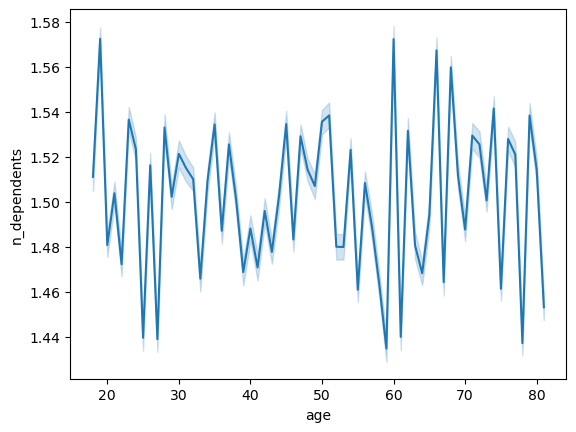

In [24]:
# Creating the line chart

line_2 = sns.lineplot(data = df_relevant_columns_1, x = 'age', y = 'n_dependents')

##### The line chart does not show any clear or consistent relationship between age and number of dependants. The data fluctuates randomly across all age groups, suggesting that age alone is not a strong predictor of how many dependants a customer has.

##### Suggestions:

##### Try with other variables (e.g. marital status, region) to see whether we can find some relationships or patterns, and create campaigns accodingly.

#### <b>Step No. 7</b>

#### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

#### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

<Axes: xlabel='age', ylabel='income'>

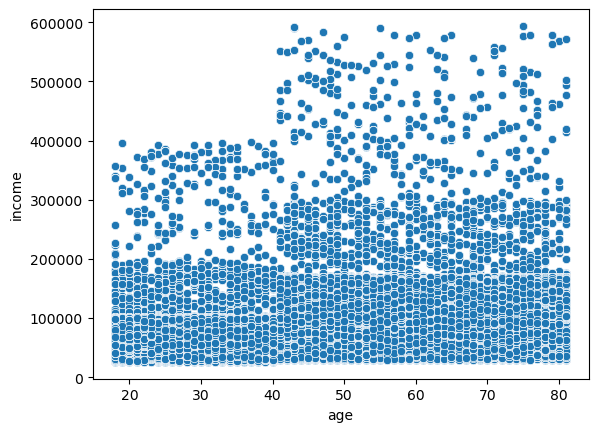

In [25]:
sns.scatterplot(x = 'age', y = 'income', data = df_final_dataframe)

##### The scatterplot shows that there's a great deal of unique income values. Still, it does not show a relationship/correlation between age and income - that is, it does not suggest that the older the person, the more/less income.

#### <b>Step No. 8</b>

#### Export your visualizations as “.png” files in your relevant project folder.

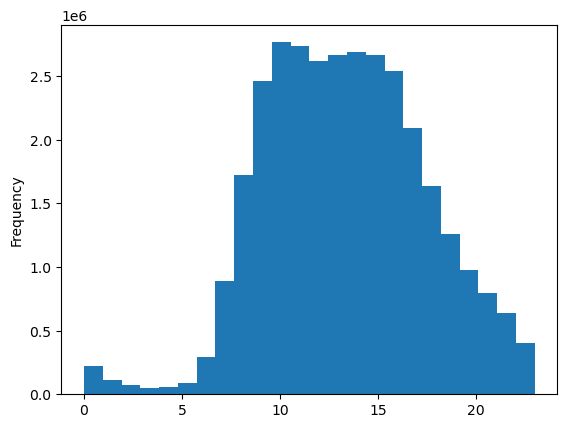

In [26]:
# Histogram

hist = df_final_dataframe['order_hour_of_day'].plot.hist(bins = 24)

In [27]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hour_day.png'))

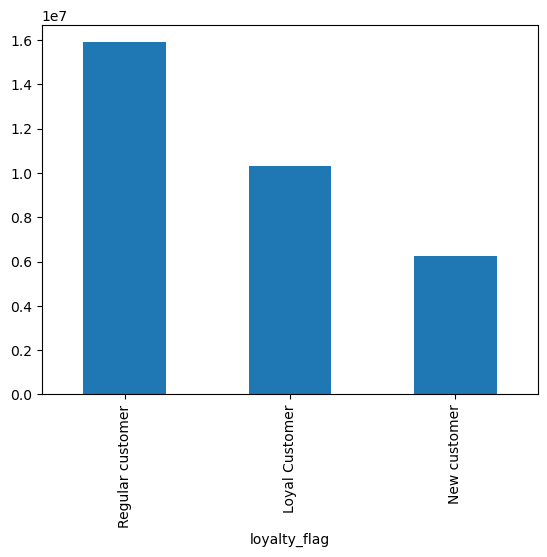

In [28]:
# Bar chart

bar = df_final_dataframe['loyalty_flag'].value_counts().plot.bar()

In [29]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_loyalty.png'))

In [30]:
# Line chart (step 5)

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_order_hour_day.png'))

In [31]:
# Line chart (step 6)

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

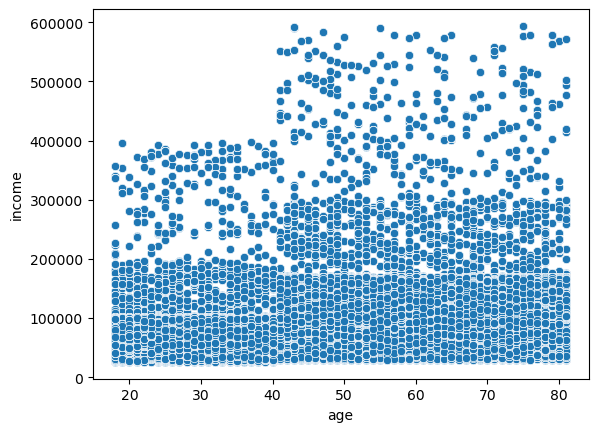

In [32]:
# Scatterplot

scat = sns.scatterplot(x = 'age', y = 'income', data = df_final_dataframe)

In [33]:
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))

In [34]:
df_final_dataframe.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', '_merge', 'merge_status',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spend_user',
       'spending_flag', 'ord_regularity_median', 'frequency_flag',
       'first_name', 'surname', 'gender', 'state', 'age', 'date_joined',
       'n_dependents', 'fam_status', 'income', 'merging_status'],
      dtype='object')

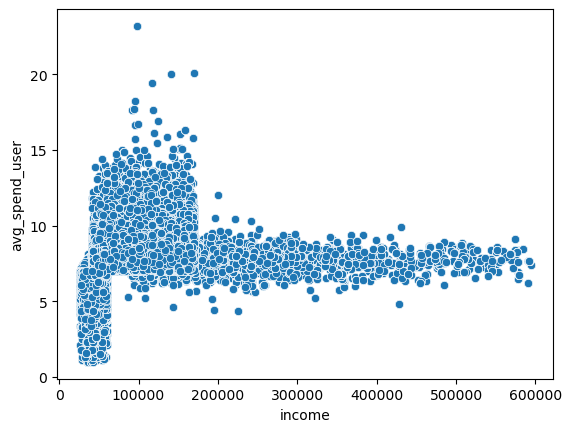

In [36]:
# A seconds scatterplot comparing average spending with income

scat = sns.scatterplot(x = 'income', y = 'avg_spend_user', data = df_final_dataframe)

In [37]:
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_avg_spend_income.png'))

##### The average spending does not increase as the income increases. In fact, lower and middle class individuals tend to spend more than upper class individuals. The latest average spenditure tends to be within a range of 5 - 10.

#### **Bonus**

##### Let's check product's price ranges

In [42]:
# This map will be useful to show dep names in the visualization - not just the numbers

dept_dict = {
    1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol', 6: 'international',
    7: 'beverages', 8: 'pets', 9: 'dry goods pasta', 10: 'bulk', 11: 'personal care',
    12: 'meat seafood', 13: 'pantry', 14: 'breakfast', 15: 'canned goods',
    16: 'dairy eggs', 17: 'household', 18: 'babies', 19: 'snacks', 20: 'deli', 21: 'missing'
}

In [43]:
# Assign the names to the IDs

df_final_dataframe['department_name'] = df_final_dataframe['department_id'].map(dept_dict)

In [44]:
# Grouping and counting

price_counts = df_final_dataframe.groupby(['department_name', 'price_range_loc']).size().reset_index(name='count')

In [45]:
# Sorting results from highest to lowest

dept_order = price_counts.groupby('department_name')['count'].sum().sort_values(ascending=False).index

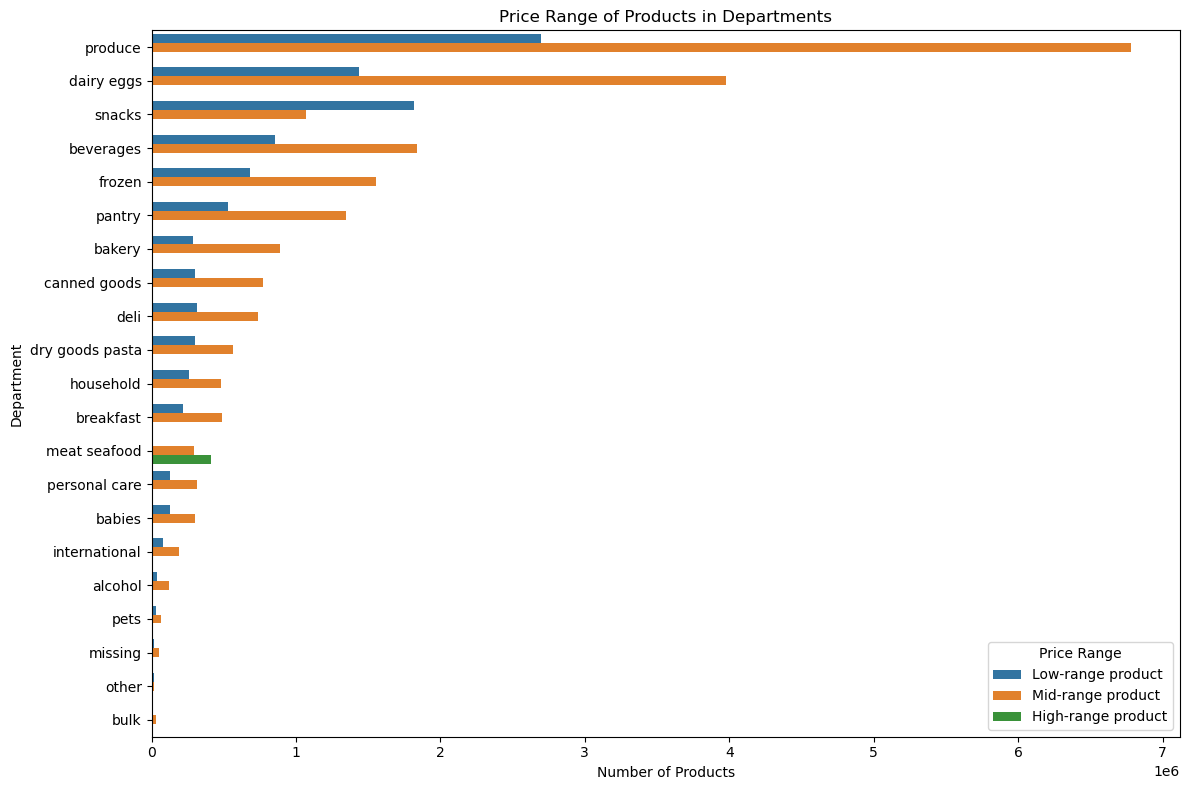

In [48]:
# Plot
viz_price_range = plt.figure(figsize=(12, 8))
sns.barplot(
    data=price_counts,
    y='department_name',
    x='count',
    hue='price_range_loc',
    order=dept_order,
    orient='h'
)

# Step 7: Final formatting
plt.title('Price Range of Products in Departments')
plt.xlabel('Number of Products')
plt.ylabel('Department')
plt.legend(title='Price Range')
plt.tight_layout()
plt.show()

In [49]:
# Exporting

viz_price_range.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_by_department.png'))

##### Let's create the 'income class' column here, too

In [54]:
# Filters 1: 

df_final_dataframe.loc[df_final_dataframe['income'] < 52000, 'income_class'] = 'lower_class'

In [56]:
# Filters 2: 

df_final_dataframe.loc[(df_final_dataframe['income'] >= 52000) & (df_final_dataframe['income'] < 156000), 'income_class'] = 'middle_class'

In [57]:
# Filters 3: 

df_final_dataframe.loc[df_final_dataframe['income'] >= 156000, 'income_class'] = 'upper_class'

In [58]:
# Let's see if there's some sort of relationship between income and no. of dependents

df_final_dataframe.groupby('income_class').agg({'n_dependents': ['mean']})

,n_dependents
,mean
income_class,
lower_class,1.505177
middle_class,1.502656
upper_class,1.490735


##### **Some comments**

##### The 'Bulk' category has the least inventory. If high-income people uses our app to make bulk purchases, this can explain why they're spending less than low and middle income customers.

##### The income class is not positively correlated with number of dependents; however, it would be helpful to have the variable 'babies'. If high-income people tend to have more babies than the other two classes, then another strategy to increase sales among high-income people would be to add more products (inventory) to the 'babies' category.

##### There's no info about the number of pets. This variable would help us get insights on whether or not increasing inventory in this category might increase sales among all income classes.